## Importing Libraries 

In [86]:
#Importing important libraries 
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
import seaborn as sns

import warnings 
warnings.filterwarnings('ignore')

In [87]:
#uploading dataset
df = pd.read_csv(r'/content/seeds.csv')

In [88]:
df

,Area,Perimeter,Compactness,Kernel.Length,Kernel.Width,Asymmetry.Coeff,Kernel.Groove,Type
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,1
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,1
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,1
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,1
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,1
...,...,...,...,...,...,...,...,...
194,12.19,13.20,0.8783,5.137,2.981,3.631,4.870,3
195,11.23,12.88,0.8511,5.140,2.795,4.325,5.003,3
196,13.20,13.66,0.8883,5.236,3.232,8.315,5.056,3
197,11.84,13.21,0.8521,5.175,2.836,3.598,5.044,3


## Data preparation 

In [84]:
df = df.loc[:, ~df.columns.str.contains('NaN')]

In [85]:
df["Type"].replace({1 :"Kama" , 2 :"Rosa" , 3 :"Canadian"} , inplace = True)
df

,Area,Perimeter,Compactness,Kernel.Length,Kernel.Width,Asymmetry.Coeff,Kernel.Groove,Type
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,Kama
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,Kama
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,Kama
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,Kama
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,Kama
...,...,...,...,...,...,...,...,...
194,12.19,13.20,0.8783,5.137,2.981,3.631,4.870,Canadian
195,11.23,12.88,0.8511,5.140,2.795,4.325,5.003,Canadian
196,13.20,13.66,0.8883,5.236,3.232,8.315,5.056,Canadian
197,11.84,13.21,0.8521,5.175,2.836,3.598,5.044,Canadian


## **EDA**

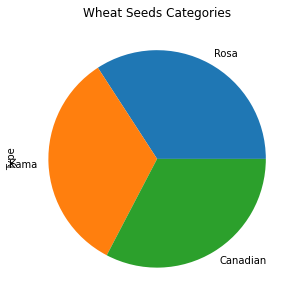

In [53]:
df['Type'].value_counts().plot(kind='pie', title='Wheat Seeds Categories', figsize=(15,5))
plt.show()

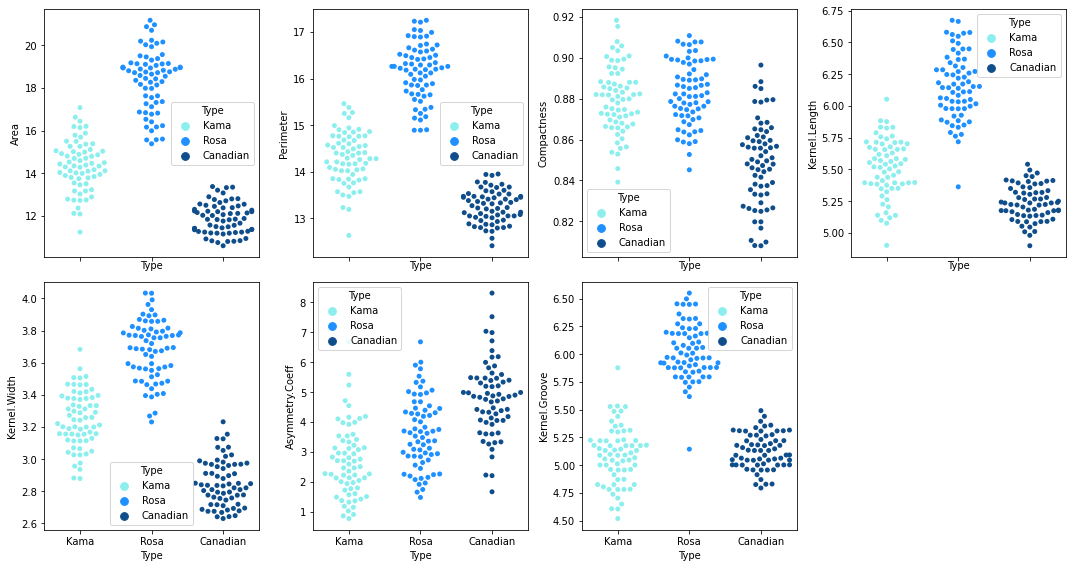

In [54]:
import matplotlib.pyplot as plt
import seaborn as sns
#Data Visualization - Label vs other continuous variables - swarmplot
fig, axs = plt.subplots(ncols = 4, nrows = 2, figsize=(15,8),sharex=True)
for axi,col_name in zip(axs.flat,list(df.columns)):
    sns.swarmplot(x="Type",y=col_name,data=df,ax=axi,hue="Type",palette=["#8DEEEE","#1E90FF","#104E8B"])
fig.delaxes(ax = axs[1,3])
fig.tight_layout()
fig.show()

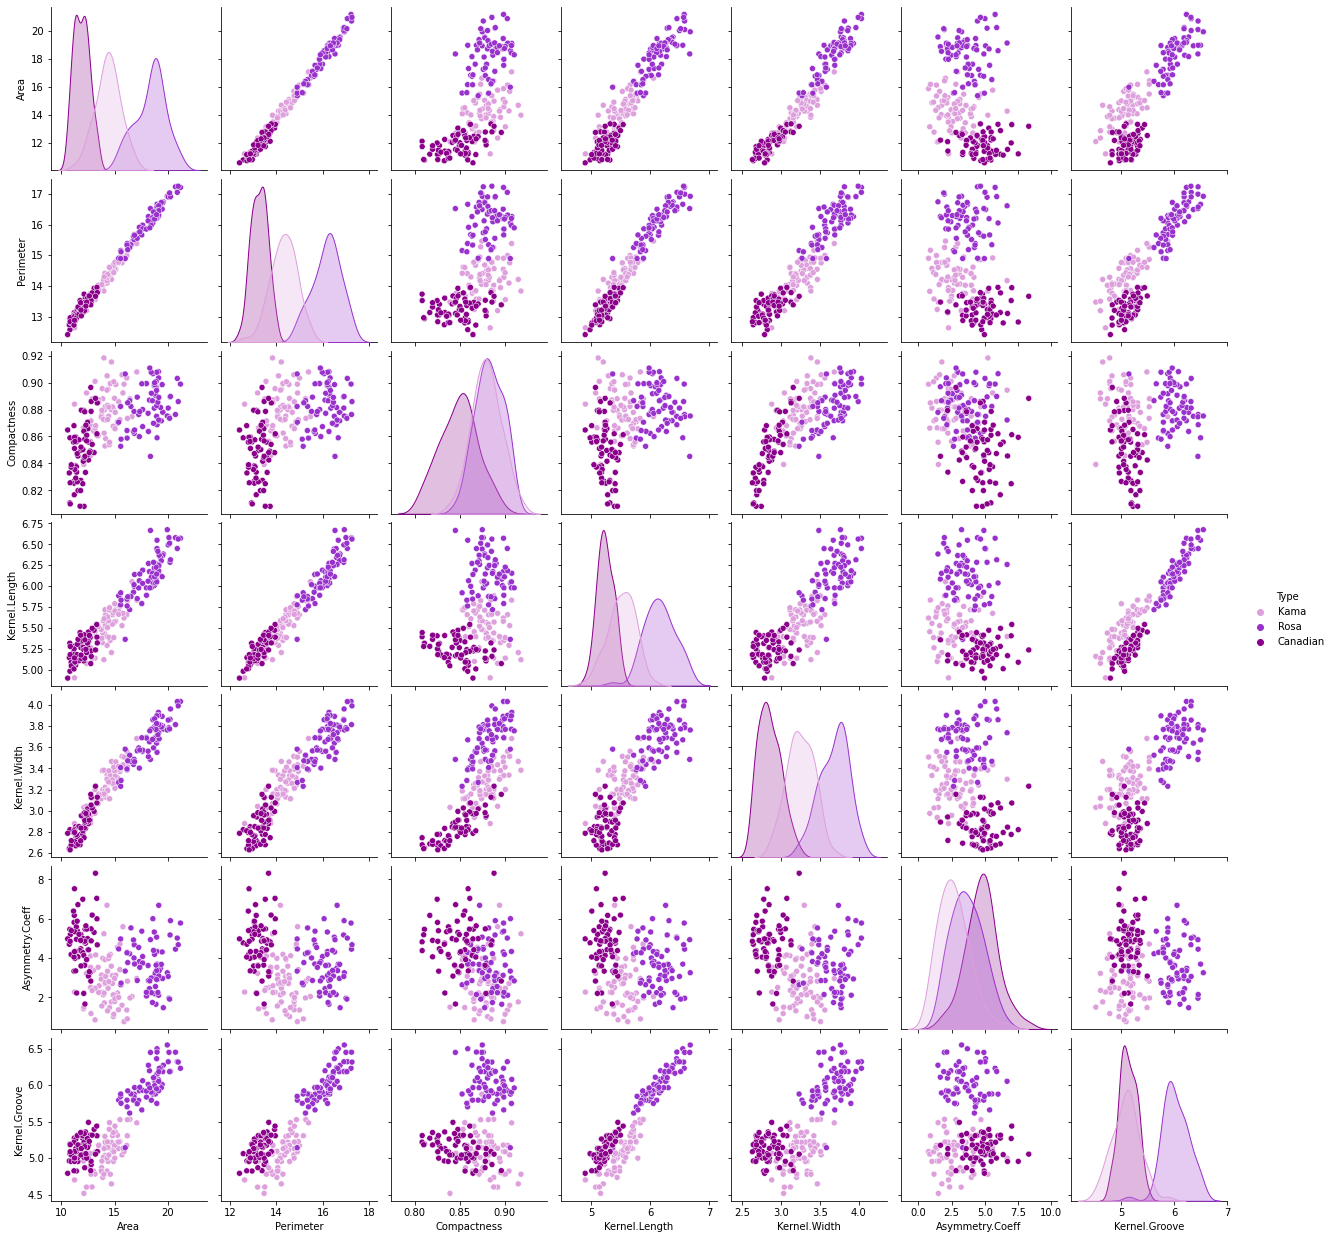

In [55]:
#Data Visualization - Continuous Variables - pairplot
sns.pairplot(data=df,hue="Type",palette=["plum","darkorchid","darkmagenta"])
plt.show()

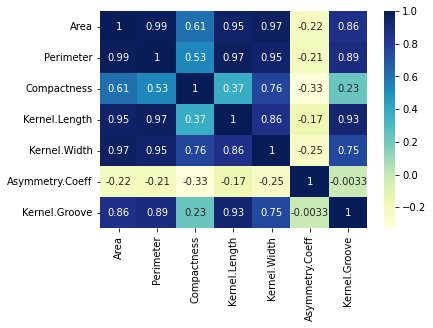

In [50]:
#Data Visualization - Continuous Variables - heatmap
sns.heatmap(df[list(df.columns[:-1])].corr(),annot=True,cmap="YlGnBu")
plt.show()

## Modelling

In [58]:
# Independent and Dependent features
#Create x and y variables
x = df.drop('Type', axis=1)
y = df['Type']

cols = x.columns
index = x.index

In [62]:
x = df.iloc[:,0:7]
y = df.iloc[:,7]

In [64]:
x

,Area,Perimeter,Compactness,Kernel.Length,Kernel.Width,Asymmetry.Coeff,Kernel.Groove
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175
...,...,...,...,...,...,...,...
194,12.19,13.20,0.8783,5.137,2.981,3.631,4.870
195,11.23,12.88,0.8511,5.140,2.795,4.325,5.003
196,13.20,13.66,0.8883,5.236,3.232,8.315,5.056
197,11.84,13.21,0.8521,5.175,2.836,3.598,5.044


In [65]:
y

0          Kama
1          Kama
2          Kama
3          Kama
4          Kama
         ...   
194    Canadian
195    Canadian
196    Canadian
197    Canadian
198    Canadian
Name: Type, Length: 199, dtype: object

In [66]:
df.describe

<bound method NDFrame.describe of       Area  Perimeter  Compactness  Kernel.Length  Kernel.Width  \
0    15.26      14.84       0.8710          5.763         3.312   
1    14.88      14.57       0.8811          5.554         3.333   
2    14.29      14.09       0.9050          5.291         3.337   
3    13.84      13.94       0.8955          5.324         3.379   
4    16.14      14.99       0.9034          5.658         3.562   
..     ...        ...          ...            ...           ...   
194  12.19      13.20       0.8783          5.137         2.981   
195  11.23      12.88       0.8511          5.140         2.795   
196  13.20      13.66       0.8883          5.236         3.232   
197  11.84      13.21       0.8521          5.175         2.836   
198  12.30      13.34       0.8684          5.243         2.974   

     Asymmetry.Coeff  Kernel.Groove      Type  
0              2.221          5.220      Kama  
1              1.018          4.956      Kama  
2              2.

In [67]:
# Train Test Split
from sklearn.model_selection import train_test_split

In [68]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=0)

## Algorithm selection

In [69]:
# Creating a list of models and appending to it the classifier algo names. 
classify_algoModels = []

classify_algoModels.append(('KNN', KNeighborsClassifier(11)))
classify_algoModels.append(('NB', GaussianNB()))
classify_algoModels.append(('SVM', SVC()))
classify_algoModels.append(('Decision Tree', DecisionTreeClassifier(max_depth=6)))

## Model Evaluation

In [71]:
# evaluate each model in turn                           
metrics = []
algo_names = []
scoring = 'accuracy'
for name, classification_model in classify_algoModels:
    kfold_validate = model_selection.KFold(n_splits=7, shuffle=True, random_state=42)
    cv_metrics = model_selection.cross_val_score(classification_model, x, y, cv=kfold_validate, scoring=scoring)
    metrics.append(cv_metrics)
    algo_names.append(name)
    result = "%s: Mean Accuracy %f" % (name, cv_metrics.mean())
    print(result)

KNN: Mean Accuracy 0.904996
NB: Mean Accuracy 0.909747
SVM: Mean Accuracy 0.909747
Decision Tree: Mean Accuracy 0.910099


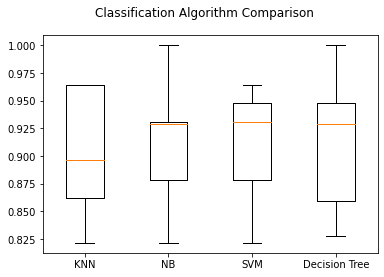

In [72]:
# Visualizing the metrics
fig = plt.figure()
fig.suptitle('Classification Algorithm Comparison')
axis = fig.add_subplot(111)
plt.boxplot(metrics)
axis.set_xticklabels(algo_names)
plt.show()

## Model Implementation 

In [73]:
#Implementing Decision Tree 
dtc=DecisionTreeClassifier()
dtc.fit(x_train,y_train)

DecisionTreeClassifier()

In [75]:
y_pred=dtc.predict(x_test)

In [77]:
from sklearn.metrics import accuracy_score
score=accuracy_score(y_test,y_pred)
score

0.8833333333333333

## Prediction

In [80]:
#predicting 
dtc.predict([[16.14,14.99,0.9034,5.658,3.562,1.355,5.175]])

array(['Rosa'], dtype=object)

## Creating pickle file

In [89]:
# Create a Pickle file  
import pickle
pickle_out = open("classifier.pkl","wb")
pickle.dump(dtc, pickle_out)
pickle_out.close()